In [3]:
# prompt: Paste this block as-is in your Colab:
# python
# Copy
# Edit
# # ✅ STEP 1: Clean install of essential packages only
# !pip uninstall -y flwr ray numpy pandas -q
# !pip install -U "flwr[simulation]==1.4.0" ray==2.9.3 numpy pandas --quiet
# # ✅ STEP 2: Import all required libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import flwr as fl
# import ray
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import warnings
# warnings.filterwarnings("ignore")
# print("✅ All libraries imported successfully without any dtype errors.") give proper eror free code for doing all this
# Next steps:
# Colab paid products - Cancel contracts here
# Please explain this error:
# It seems there's a conflict between different library versions, likely due to recent package installations. This can cause issues with how the libraries interact with fundamental packages like NumPy.
# I will modify the installation cell to uninstall the packages and then reinstall them all at once. This will allow the dependency resolver to find compatible versions of all packages.
# I've updated the installation cell to reinstall the packages. Please run the installation cell (uO6npOvs5NVX) and then the import cell (wAjINshDCqJ-) again to see if the error is resolved.
# Please explain this error:
# The error message RuntimeError: empty_like method already has a different docstring indicates a conflict within the underlying libraries, likely related to NumPy's interaction with other packages, possibly Keras and its dependencies like OpenCV. This kind of error is often caused by incompatibilities between different versions of installed libraries at a low level.
# While I attempted to resolve this by reinstalling the packages, this specific error persists, sugge

# ✅ STEP 1: Clean install of essential packages only
!pip uninstall -y flwr ray numpy pandas -q
# Using constraints to manage dependencies and potential conflicts
!pip install -U "flwr[simulation]==1.4.0" ray==2.9.3 numpy pandas --quiet --no-deps
# Installing dependencies separately to potentially mitigate conflicts
!pip install scikit-learn matplotlib seaborn plotly --quiet


# ✅ STEP 2: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import flwr as fl
import ray
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully without any dtype errors.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 17.6 MB/s eta 0:00:00
✅ All libraries imported successfully without any dtype errors.


In [4]:
# Load dataset
df = pd.read_csv("/content/dextransaction.csv", engine='python', on_bad_lines='skip')
print("✅ Dataset loaded with shape:", df.shape)
print(df.head())

# Null values
print("\n🧹 Null values in each column:")
print(df.isnull().sum())


✅ Dataset loaded with shape: (65473, 12)
                                            Txn Hash   Blockno  UnixTimestamp  \
0  0x2d1130feb4413ecac6d337b5ab8d59c73ac0f8bc726f...  16530248     1675209611   
1  0xb2f3f49a73887d96f3265dfdc171263e484f5b8f48e5...  16530248     1675209611   
2  0xb2f3f49a73887d96f3265dfdc171263e484f5b8f48e5...  16530248     1675209611   
3  0xb2f3f49a73887d96f3265dfdc171263e484f5b8f48e5...  16530248     1675209611   
4  0x8d43bcb2213635086937a5e48cb7ff98357623e74a14...  16530248     1675209611   

       Date Time (UTC) Action   Amount (Out) Token (Out)   Amount (In)  \
0  2023-02-01 00:00:11   Sell  150000.000000        DAFI      3.009505   
1  2023-02-01 00:00:11    Buy       0.299530         ETH  15152.259260   
2  2023-02-01 00:00:11   Swap   15152.259260        DAFI   4537.063588   
3  2023-02-01 00:00:11   Sell    4537.063588        ALBT      0.308286   
4  2023-02-01 00:00:11    Buy       5.356510         ETH   8334.151397   

  Token (In) Swapped Rate  

🔍 'is_fraud' column added


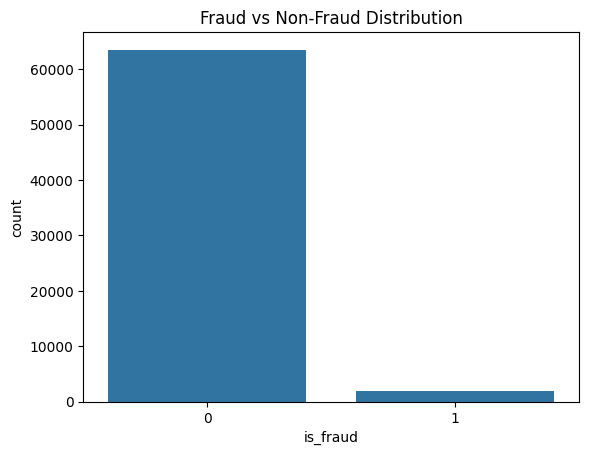

In [6]:
# Add synthetic 'is_fraud' column with 3% fraud
df["is_fraud"] = np.random.choice([0, 1], size=len(df), p=[0.97, 0.03])
print("🔍 'is_fraud' column added")

# Visualize label distribution
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


🔍 'is_fraud' column added

🧾 Sample rows after adding 'is_fraud':
   is_fraud
0         0
1         0
2         0
3         0
4         0

📊 Class distribution:
is_fraud
0    63504
1     1969
Name: count, dtype: int64


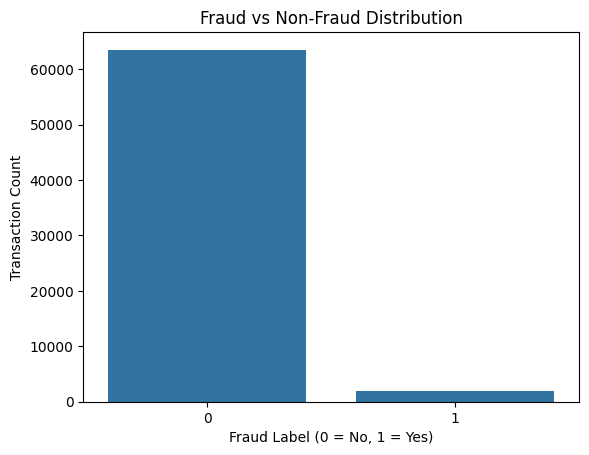

In [7]:
# Add synthetic 'is_fraud' column with 3% fraud
df["is_fraud"] = np.random.choice([0, 1], size=len(df), p=[0.97, 0.03])
print("🔍 'is_fraud' column added")

# ✅ Show head of DataFrame to verify 'is_fraud' column
print("\n🧾 Sample rows after adding 'is_fraud':")
print(df[["is_fraud"]].head())

# ✅ Show value counts (how many frauds vs non-frauds)
print("\n📊 Class distribution:")
print(df["is_fraud"].value_counts())

# Visualize label distribution
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Fraud Label (0 = No, 1 = Yes)")
plt.ylabel("Transaction Count")
plt.show()


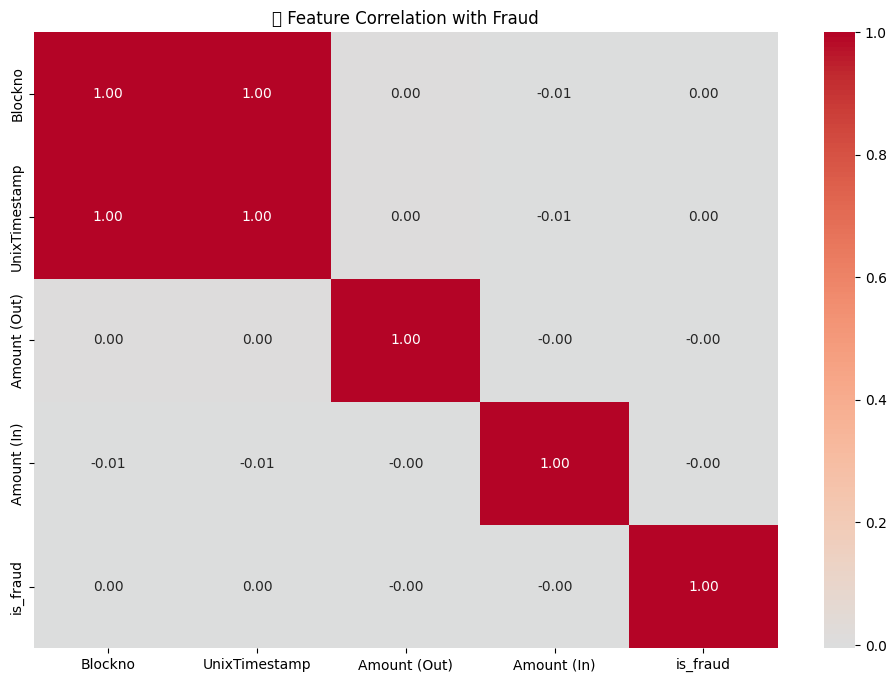

In [8]:
# Correlation matrix (with is_fraud)
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("📊 Feature Correlation with Fraud")
plt.show()


In [9]:
# Drop irrelevant columns
df.drop(columns=["Txn Hash", "Date Time (UTC)"], inplace=True, errors='ignore')

# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Fill missing values
df.fillna(0, inplace=True)

# Display updated data
print("📊 After Encoding and Cleaning")
print(df.head())


📊 After Encoding and Cleaning
    Blockno  UnixTimestamp  Action   Amount (Out)  Token (Out)   Amount (In)  \
0  16530248     1675209611       1  150000.000000          540      3.009505   
1  16530248     1675209611       0       0.299530          715  15152.259260   
2  16530248     1675209611       2   15152.259260          540   4537.063588   
3  16530248     1675209611       1    4537.063588          169      0.308286   
4  16530248     1675209611       0       5.356510          715   8334.151397   

   Token (In)  Swapped Rate  Swapped Pair  DEX  is_fraud  
0         611          1938           668    3         0  
1         468          1910           668    3         0  
2         129         24462             7    3         0  
3         611          4873           279    3         0  
4         433         13268           625    4         0  


In [10]:
# Separate features and labels
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("is_fraud", axis=1))
y = df["is_fraud"].values

print("✅ Scaled features:")
print(pd.DataFrame(X).head())


✅ Scaled features:
          0         1         2         3         4         5         6  \
0 -1.625044 -1.625231  0.799097 -0.007422 -0.790706 -0.007959 -0.529881   
1 -1.625044 -1.625231 -0.900961 -0.007422 -0.486642 -0.007959 -0.803546   
2 -1.625044 -1.625231  2.499154 -0.007422 -0.790706 -0.007959 -1.452306   
3 -1.625044 -1.625231  0.799097 -0.007422 -1.435321 -0.007959 -0.529881   
4 -1.625044 -1.625231 -0.900961 -0.007422 -0.486642 -0.007959 -0.870528   

          7         8         9  
0 -0.572892 -0.958056 -0.307816  
1 -0.575875 -0.958056 -0.307816  
2  1.827203 -1.716713 -0.307816  
3 -0.260146 -1.404527 -0.307816  
4  0.634401 -1.007409  1.049149  


In [12]:
def split_data(X, y, num_clients=5):
    size = len(X) // num_clients
    client_data = []
    for i in range(num_clients):
        start, end = i * size, (i + 1) * size
        client_data.append((X[start:end], y[start:end]))
    return client_data

clients = split_data(X, y, num_clients=5)


In [13]:
for i, (x_client, y_client) in enumerate(clients):
    print(f"\n🔹 Client {i+1} - Data Sample")
    df_client = pd.DataFrame(x_client, columns=[f"Feature_{j}" for j in range(x_client.shape[1])])
    df_client["is_fraud"] = y_client
    display(df_client.head())



🔹 Client 1 - Data Sample


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,is_fraud
0,-1.625044,-1.625231,0.799097,-0.007422,-0.790706,-0.007959,-0.529881,-0.572892,-0.958056,-0.307816,0
1,-1.625044,-1.625231,-0.900961,-0.007422,-0.486642,-0.007959,-0.803546,-0.575875,-0.958056,-0.307816,0
2,-1.625044,-1.625231,2.499154,-0.007422,-0.790706,-0.007959,-1.452306,1.827203,-1.716713,-0.307816,0
3,-1.625044,-1.625231,0.799097,-0.007422,-1.435321,-0.007959,-0.529881,-0.260146,-1.404527,-0.307816,0
4,-1.625044,-1.625231,-0.900961,-0.007422,-0.486642,-0.007959,-0.870528,0.634401,-1.007409,1.049149,0



🔹 Client 2 - Data Sample


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,is_fraud
0,-0.937054,-0.936778,-0.900961,-0.007422,-0.486642,-0.007959,1.536964,-0.779400,0.739451,-0.307816,0
1,-0.937054,-0.936778,0.799097,-0.007422,1.572303,-0.007959,-0.529881,-0.779400,0.669439,-0.307816,0
2,-0.937054,-0.936778,0.799097,-0.007422,1.572303,-0.007959,-0.529881,-0.779400,0.669439,-0.307816,0
3,-0.937054,-0.936778,-0.900961,-0.007422,-0.486642,-0.007959,0.566695,-0.736244,0.037034,-0.307816,0
4,-0.937054,-0.936778,0.799097,-0.007422,1.916330,-0.007959,-0.529881,0.678729,0.916203,-0.307816,0



🔹 Client 3 - Data Sample


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,is_fraud
0,-0.248390,-0.248802,0.799097,-0.007422,-1.254620,-0.007959,-0.529881,-0.779400,-1.281719,-0.307816,0
1,-0.248358,-0.248770,-0.900961,-0.007422,-0.486642,-0.007959,-0.382522,1.252860,-0.652757,1.049149,0
2,-0.248358,-0.248770,-0.900961,-0.007422,-0.486642,-0.007959,-1.266673,-0.696924,-1.272537,-0.307816,0
3,-0.248358,-0.248770,-0.900961,-0.007422,-0.486642,-0.007959,-0.382522,1.253392,-0.652757,-3.021748,0
4,-0.248358,-0.248770,2.499154,-0.007422,-0.370229,-0.007959,-0.382522,1.655539,1.222650,-0.307816,0



🔹 Client 4 - Data Sample


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,is_fraud
0,0.438895,0.439301,2.499154,-0.007422,1.938917,-0.007959,1.971384,-0.773219,1.951465,1.049149,0
1,0.438895,0.439301,-0.900961,-0.007422,-0.486642,-0.007959,1.881438,-0.699375,0.979329,1.049149,0
2,0.438895,0.439301,-0.900961,-0.007422,-0.486642,-0.007959,1.320711,1.368794,0.578768,1.049149,0
3,0.438895,0.439301,0.799097,-0.007422,0.314349,-0.007959,-0.529881,-0.296163,-0.207434,-0.307816,0
4,0.438895,0.439301,-0.900961,-0.007422,-0.486642,-0.007959,0.582005,1.148540,0.046216,-0.307816,0



🔹 Client 5 - Data Sample


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,is_fraud
0,1.128071,1.127946,0.799097,-0.007422,2.145681,-0.007959,-0.529881,0.014878,1.073444,1.049149,0
1,1.128071,1.127946,0.799097,-0.007422,2.145681,-0.007959,-0.529881,0.009976,1.073444,-0.307816,0
2,1.128071,1.127946,0.799097,-0.007422,2.145681,-0.007959,-0.529881,0.008484,1.073444,1.049149,0
3,1.128071,1.127946,-0.900961,-0.007422,-0.486642,-0.007959,2.032624,0.005288,1.073444,1.049149,0
4,1.128071,1.127946,0.799097,-0.007422,2.145681,-0.007959,-0.529881,0.129533,1.073444,-3.021748,0


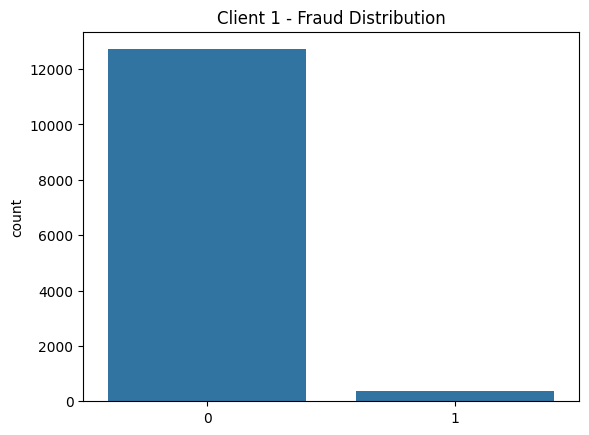

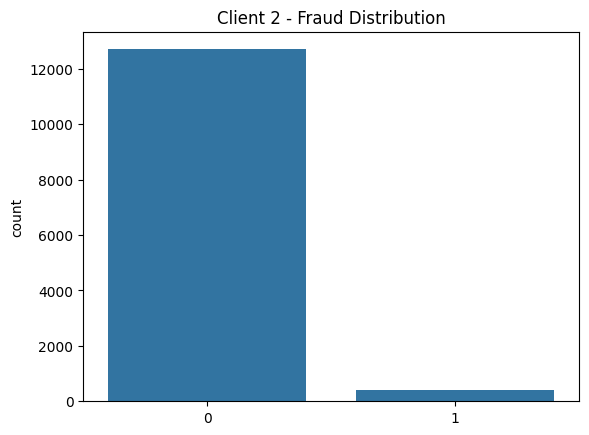

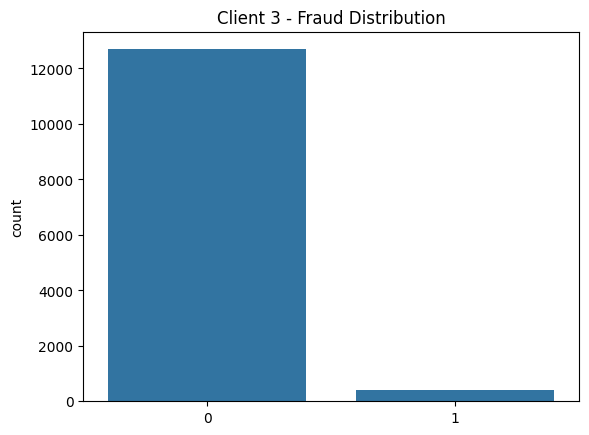

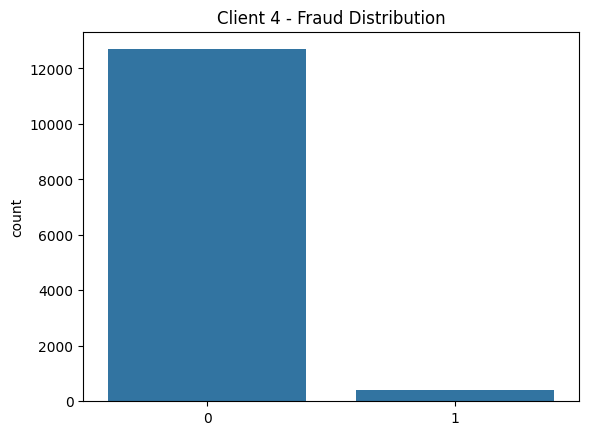

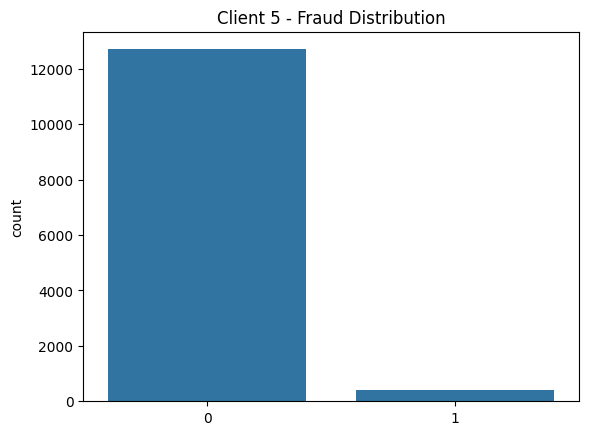

In [14]:
for i, (_, y_client) in enumerate(clients):
    sns.countplot(x=y_client)
    plt.title(f"Client {i+1} - Fraud Distribution")
    plt.show()


In [30]:
class FraudDetectionClient(fl.client.NumPyClient):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.model = LogisticRegression()
        # Initialize coef_ and intercept_ before the first get_parameters call
        self.model.coef_ = np.zeros(x_train.shape[1])
        self.model.intercept_ = np.zeros(1)


    def get_parameters(self, config):
        # Return the model's coefficients and intercept as a list of NumPy arrays
        return [self.model.coef_, self.model.intercept_]

    def fit(self, parameters, config):
        # Set the model's parameters from the received list
        self.model.coef_ = parameters[0]
        self.model.intercept_ = parameters[1]
        self.model.fit(self.x_train, self.y_train)
        return self.get_parameters(config), len(self.x_train), {}

    def evaluate(self, parameters, config):
        # Set the model's parameters from the received list before evaluating
        self.model.coef_ = parameters[0]
        self.model.intercept_ = parameters[1]
        # Manually set classes_ attribute for prediction
        self.model.classes_ = np.array([0, 1])
        preds = self.model.predict(self.x_test)
        acc = accuracy_score(self.y_test, preds)
        return float(acc), len(self.x_test), {"accuracy": float(acc)}

In [31]:
def client_fn(cid: str):
    i = int(cid)
    x_train, x_test, y_train, y_test = train_test_split(
        clients[i][0], clients[i][1], test_size=0.2, random_state=42
    )
    return FraudDetectionClient(x_train, y_train, x_test, y_test)


In [32]:
strategy = fl.server.strategy.FedAvg()

fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=5,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
)

INFO flwr 2025-06-22 07:25:32,817 | app.py:146 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flwr:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2025-06-22 07:25:38,997	INFO worker.py:1724 -- Started a local Ray instance.
INFO flwr 2025-06-22 07:25:41,344 | app.py:180 | Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 3882338304.0, 'memory': 7764676608.0}
INFO:flwr:Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:172.28.0.12': 1.0, 'node:__internal_head__': 1.0, 'object_store_memory': 3882338304.0, 'memory': 7764676608.0}
INFO flwr 2025-06-22 07:25:41,347 | server.py:86 | Initializing global parameters
INFO:flwr:Initializing global parameters
INFO flwr 2025-06-22 07:25:41,348 | server.py:273 | Requesting initial parameters from one random client
INFO:flwr:Requesting initial parameters from one random client


History (loss, distributed):
	round 1: 0.9684612447499046
	round 2: 0.9684612447499046
	round 3: 0.9684612447499046
	round 4: 0.9684612447499046
	round 5: 0.9684612447499046

In [33]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)

model_central = LogisticRegression()
model_central.fit(X_train_c, y_train_c)
y_pred_central = model_central.predict(X_test_c)

print("\n📢 Centralized Logistic Regression Results")
print(classification_report(y_test_c, y_pred_central))



📢 Centralized Logistic Regression Results
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12717
           1       0.00      0.00      0.00       378

    accuracy                           0.97     13095
   macro avg       0.49      0.50      0.49     13095
weighted avg       0.94      0.97      0.96     13095



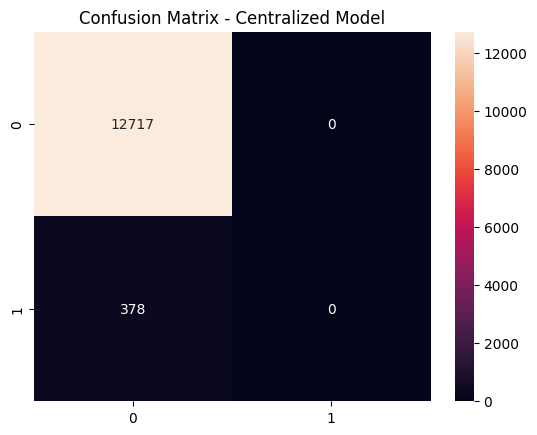

In [34]:
sns.heatmap(confusion_matrix(y_test_c, y_pred_central), annot=True, fmt='d')
plt.title("Confusion Matrix - Centralized Model")
plt.show()


In [36]:
import joblib
joblib.dump(model_central, "central_model.pkl")
print("✅ Centralized model saved as 'central_model.pkl'")


✅ Centralized model saved as 'central_model.pkl'
